## 1. Load the dataset with scikit-learn

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from myknn import KNN

breastcancer=load_breast_cancer()

## 2. Split dataset to train and test datasets (%80 for train and %20 for test).

In [3]:
X=breastcancer.data
Y=breastcancer.target

X_train, X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.2)

## 3. Implement and fit your object oriented KNN algorithm on the train dataset.

In [4]:
knn=KNN(3)
knn.fit(X_train,Y_train)

## 4. Evaluate your KNN algorithm on the test dataset with different values of k = 3, 5, 7, ... and write accuracy results as a table in readme.md. 

In [5]:
from IPython.display import HTML, display

def display_table(data):
    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td><h2>%s</h2></td>"%(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))

accuracytable=[[],[]]
k=accuracytable[0]
acc=accuracytable[1]
k.append('K')
acc.append('Accuracy')

for i in range(3,13,2):
    knn=KNN(i)
    k.append(i)
    knn.fit(X_train,Y_train)
    accuracy=knn.evaluate(X_test,Y_test)
    acc.append(accuracy)






display_table(accuracytable)

K,3,5,7,9,11
Accuracy,0.9035087719298246,0.8947368421052632,0.8947368421052632,0.8947368421052632,0.8947368421052632


## 5. Calculate confusion matrix for test dataset (3x3).

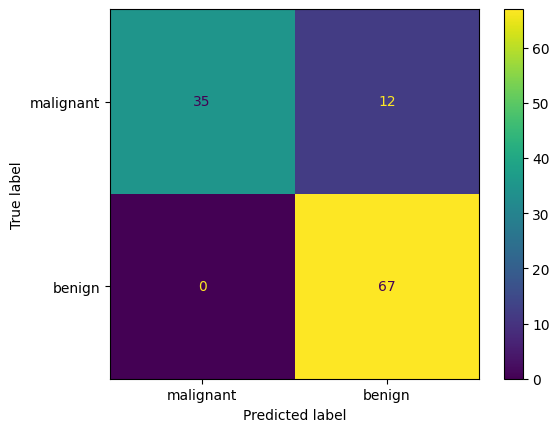

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics



y_pred = knn.predict(X_test)
confusion=confusion_matrix(Y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ["malignant", "benign"])
cm_display.plot()
plt.show()
